### 1. Load data from csv file

In [0]:
import numpy as np

DATA_PATH = './data.csv'

data = np.genfromtxt(DATA_PATH, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]
m = len(x_data)

### 2. Define functions for linear regression


2-1. Linear Model
  
  $h_\theta(x) = \theta_0 + \theta_1 x$

In [0]:
def linear(theta_0, theta_1, x):
  return theta_0 + theta_1 * x

2-2. Objective Function
  
$J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

In [0]:
def objective(h_x, y):
  return (1 / (2 * m)) * np.sum((h_x - y)**2, axis=0)

2-3. Gradient function
  
$\frac{\partial}{\partial\theta_0}J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$  
    
$\frac{\partial}{\partial\theta_1}J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$

In [0]:
def gradient(x, h_x, y):
  d_theta_0 = (1 / m) * np.sum(h_x - y, axis=0)
  d_theta_1 = (1 / m) * np.sum((h_x - y) * x, axis=0)
  return d_theta_0, d_theta_1

### 3. Learning with the gradient descent algorithm


In [0]:
# initialize model parameters and learning rate
theta_0 = -30
theta_1 = -30

lr = 0.01
epoch_count = 2000

history = {
    'energy': [],
    'theta_0': [],
    'theta_1': []
}

for epoch in range(epoch_count):
  h_x = linear(theta_0, theta_1, x_data)
  energy = objective(h_x, y_data)

  # logging history
  history['energy'].append(energy)
  history['theta_0'].append(theta_0)
  history['theta_1'].append(theta_1)

  # gradient descent
  d_theta_0, d_theta_1 = gradient(x_data, h_x, y_data)
  theta_0 -= lr * d_theta_0
  theta_1 -= lr * d_theta_1

### 4. Plot the results


4-1. Input points

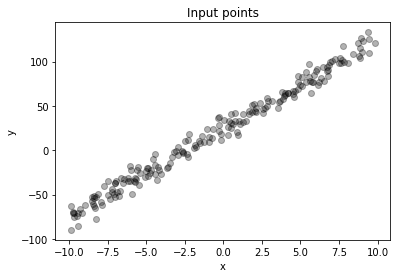

In [52]:
import matplotlib.pyplot as plt

plt.title('Input points')
plt.scatter(x_data, y_data, c='black', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4-2. Linear regression result

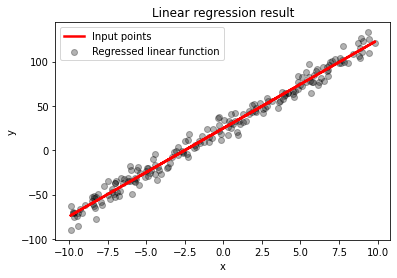

In [53]:
plt.title('Linear regression result')
plt.scatter(x_data, y_data, c='black', alpha=0.3)
plt.plot(x_data, linear(theta_0, theta_1, x_data), 'r-', linewidth=2.5)
plt.legend(['Input points', 'Regressed linear function'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4-3. Energy surface

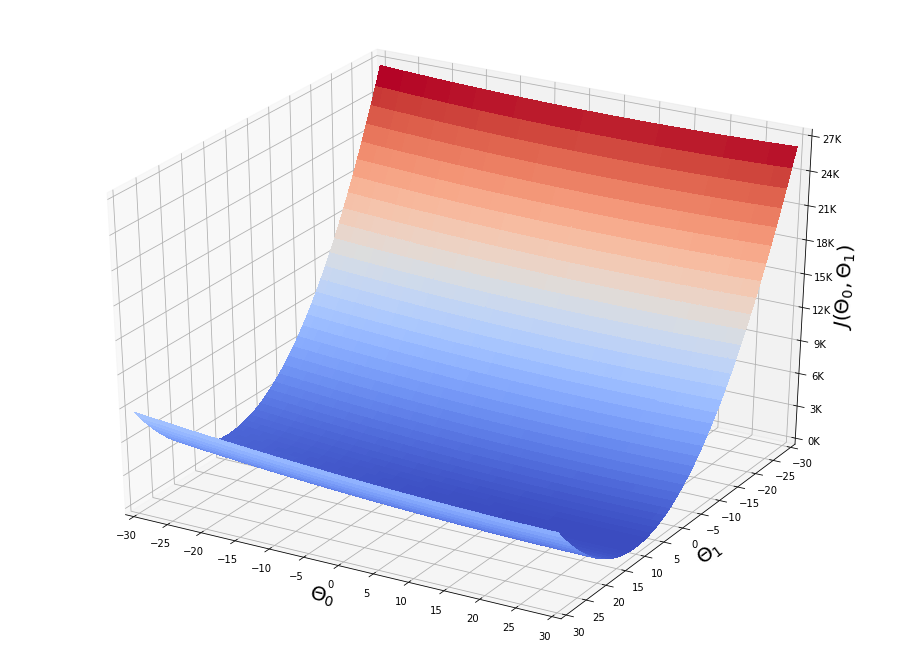

In [55]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FuncFormatter
from mpl_toolkits.mplot3d import Axes3D

# make range variables of theta
theta_0_ticks = np.arange(-30, 30, 0.1)
theta_1_ticks = np.arange(-30, 30, 0.1)
theta_0_ticks, theta_1_ticks = np.meshgrid(theta_0_ticks, theta_1_ticks)

# calculate the energy values for each theta values
ex_theta_0_ticks = np.expand_dims(theta_0_ticks, 0)
ex_theta_1_ticks = np.expand_dims(theta_1_ticks, 0)
ex_x_data = np.reshape(x_data, (-1, 1, 1))
ex_y_data = np.reshape(y_data, (-1, 1, 1))
energy_values = objective(linear(ex_theta_0_ticks, ex_theta_1_ticks, ex_x_data), ex_y_data)

# plot the surface
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0_ticks, theta_1_ticks, energy_values, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('$\Theta_0$', fontsize=20)
ax.set_ylabel('$\Theta_1$', fontsize=20)
ax.set_zlabel('$J(\Theta_0, \Theta_1)$', fontsize=20)

ax.set_xlim(-30, 30)
ax.set_ylim(30, -30)
ax.set_zlim(0, 27000)

ax.xaxis.set_major_locator(LinearLocator(13))
ax.yaxis.set_major_locator(LinearLocator(13))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%dK' % (x/1000)))

plt.show()